# BERTopic

In [1]:
import sys
sys.path.insert(0, '..')
from utils.preprocesamiento import df_to_list

In [2]:
op_left, op_right = 'Producir el alimento', 'Resguardar tradiciones'

In [3]:
import pandas as pd
from utils.cargar import df_caso
from utils.preprocesamiento import process_df, procesar_adela

caso = 'adela'
df = df_caso(caso)

df = procesar_adela(df)
df = df[df['opt_left'] == 'Producir el alimento contra déficit vitamínico']

df = process_df(df,'comment','sel',verbose=True)

train_indices = pd.read_csv('../utils/splits/train_indices_{}.csv'.format(caso), header=None)[0].tolist()
test_indices = pd.read_csv('../utils/splits/test_indices_{}.csv'.format(caso), header=None)[0].tolist()
print("Partición train-test cargada")

df_train = df.iloc[train_indices]
df_test = df.iloc[test_indices]

26 rows found with non string elements for column comment (0.40%)
Deleting 685 columns for which max target value is over 7 (10.58%)
5761 available rows after processing
Partición train-test cargada


Guardando la partición train-test

In [4]:
from utils.preprocesamiento import StemmerTokenizer

tokenizador = StemmerTokenizer(stem=False,rmv_punctuation=True)

docs_train = df_to_list(df_train,'comment',tokenizador)
docs_test = df_to_list(df_test, 'comment',tokenizador)

## BERTopic algorithm

In [5]:
from IPython.display import Image, display
display(Image(url='https://maartengr.github.io/BERTopic/algorithm/modularity.svg'))

In [6]:
%%capture
from bertopic import BERTopic

In [7]:
model = BERTopic(language="spanish",min_topic_size=10,nr_topics=25,calculate_probabilities=True)

In [8]:
%%time
topics, probs = model.fit_transform(docs_train)

CPU times: user 1min 5s, sys: 3.58 s, total: 1min 9s
Wall time: 34.2 s


In [9]:
model.get_topic_freq().head(5)

,Topic,Count
6,-1,1482
7,0,829
5,1,824
0,2,443
3,3,334


In [10]:
model.get_topic(0)[:10]

[('vitamina', 0.041939446669858105),
 ('déficit', 0.041582569992296085),
 ('vitamínico', 0.03744003189652333),
 ('alimento', 0.02592327151109369),
 ('tradiciones', 0.025364355095883973),
 ('importante', 0.024291218879156952),
 ('producir', 0.021920594233500443),
 ('deficit', 0.02116802164314391),
 ('vitaminas', 0.021004298225006646),
 ('personas', 0.018875275558153704)]

Topicos para algunos documentos

In [11]:
for i, t in enumerate(model.topics_[:10]):
    print('Tópico {}:\ttexto: {}'.format(t,docs_train[i]))

Tópico 2:	texto: Adela debería priorizar salud personas alguna creencia grupo pequeño personas
Tópico 2:	texto: Dado Adela quiere utilizar fruto tradicional pueblo originario cuál esforzado cultivar mantener vigente debería respetar condiciones pueblo originario acepta uso fruto encargados hacerlo subsistir
Tópico 9:	texto: Si bien aún proyecto obligacion considerar opinión pueblos originarios demasía importante considerar opinión respeto cultura cosmovisión Lamenetablemente existe disgusto parte últimos proyecto existirá conflicto fututo hora producir producto Lo prudente realizar estudio baja escala implementando producción alimento compromiso incluir miembros comunidades indígenas llegar acuerdos conjunto
Tópico 7:	texto: Debe priorizar producción alimento pues trata deficiencia salud puede llegar generar problemas graves si tratan todas formas seguiría tratando lograr acuerdo pueblo originario si logra terminaría priorizando producción alimento
Tópico 3:	texto: Considero debería po

### Inferencia en conjunto test

In [12]:
string = 'Aun considero necesario resguardar mas tradiciones identitarias embargo producir alimento podría ayudar muchas personas entonces debería existir diálogo ambas partes llegar mejor solución'

model.transform([string])

([-1],
 array([[1.44468667e-11, 1.85114105e-11, 2.03418283e-12, 1.62359322e-10,
         6.72172308e-01, 4.00299428e-12, 3.55694563e-12, 1.34724613e-06,
         4.76280113e-10, 1.49349680e-11, 1.57895396e-05, 3.27351938e-10,
         1.72914754e-12, 9.08505803e-11, 8.29785930e-11, 7.49725155e-11,
         9.32379804e-11, 9.72018188e-11, 9.79370398e-11, 8.16818614e-11,
         2.22516257e-12, 7.87117753e-11, 7.50923079e-10, 1.03619256e-10]]))

In [13]:
output = model.transform(df_to_list(df_test.iloc[:3],'comment',tokenizador))

Imprimiendo los embeddings

In [14]:
output[1]

array([[8.53647149e-03, 2.42409435e-03, 8.26563183e-01, 1.69185028e-03,
        7.51213716e-03, 2.22960718e-03, 2.27303930e-03, 2.80221579e-03,
        4.45354843e-03, 1.12687700e-03, 4.88232059e-03, 2.67521883e-03,
        1.46066038e-03, 8.44963103e-04, 8.29543371e-04, 7.96527331e-04,
        9.09390255e-04, 8.84772679e-04, 8.79736748e-04, 8.85827628e-04,
        1.37878694e-03, 8.12515449e-04, 9.19927622e-04, 8.71794695e-04],
       [4.19043633e-02, 1.79366984e-01, 6.40052656e-03, 2.69203346e-02,
        1.53533161e-01, 1.15153703e-02, 9.54673249e-03, 5.59185546e-02,
        7.52468940e-02, 1.88520387e-02, 8.88165851e-02, 4.56047246e-02,
        4.95434547e-03, 1.39213328e-02, 1.32974314e-02, 1.25245345e-02,
        1.51063105e-02, 1.46936220e-02, 1.47860388e-02, 1.47463860e-02,
        6.72163254e-03, 1.28957877e-02, 1.84997968e-02, 1.47065121e-02],
       [8.10771103e-16, 1.86623125e-06, 1.26693702e-16, 1.89280668e-06,
        1.31654217e-05, 2.37274903e-16, 1.94173568e-16, 4.5650

In [15]:
output[0]

[2, 1, -1]

Visualización

In [16]:
model.visualize_topics()

Podemos relacionar tópicos con palabras en específico

In [17]:
target = 'integridad'

topic_num = 5

similar_topics, similarity = model.find_topics(target, top_n=topic_num)
similar_topics

[15, 21, 17, 13, 23]

In [18]:
similarity

[0.5107682012327632,
 0.4270844639994257,
 0.32707688070107876,
 0.3246548228205115,
 0.3211775754349786]

In [19]:
from TM_utils import get_table_top_topics
from utils.exploracion import print_table_md

print("Tópicos relevantes para concepto: {}".format(target))

headers, data = get_table_top_topics(model,similar_topics,similarity,max_w=5)
print_table_md(headers, data)

Tópicos relevantes para concepto: integridad


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 | Palabra 4 | Palabra 5 |
| --- | --- | --- | --- | --- | --- | --- |
| 15 | 0.5107682012327632 | mitad | lo | esos | alimeto | promedios |
| 21 | 0.4270844639994257 | postura | mantengo | manteniendo | modifico | internet |
| 17 | 0.32707688070107876 | minoría | grupo | mantengo | originario | postura |
| 13 | 0.3246548228205115 | ambas | partes | acuerdo | llegar | dos |
| 23 | 0.3211775754349786 | salvar | acordarse | diagüita | personas | vida |


Distribución de tópicos en test set

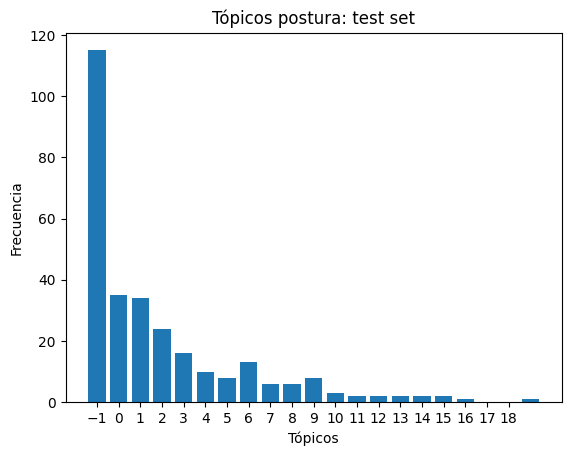

In [20]:
from TM_utils import plot_frecuencies, get_top_k_topics, get_table_top_topics
from utils.exploracion import print_table_md
from utils.preprocesamiento import StemmerTokenizer

tokenizador = StemmerTokenizer(stem=False,rmv_punctuation=True)

output_test = model.transform(df_to_list(df_test,'comment',tokenizador))

plot_frecuencies(output_test[0],label='test set')

In [21]:
top_5_keys, top_5_values = get_top_k_topics(output_test[0],k=5)
print("Tópicos relevantes en test set")

headers, data = get_table_top_topics(model,top_5_keys,top_5_values,max_w=5)
print_table_md(headers, data)

Tópicos relevantes en test set


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 | Palabra 4 | Palabra 5 |
| --- | --- | --- | --- | --- | --- | --- |
| -1 | 0.39655172413793105 | tradiciones | alimento | pueblo | si | importante |
| 0 | 0.1206896551724138 | vitamina | déficit | vitamínico | alimento | tradiciones |
| 1 | 0.11724137931034483 | fruta | fruto | pueblo | si | puede |
| 2 | 0.08275862068965517 | adela | debería | priorizar | alimento | pueblo |
| 3 | 0.05517241379310345 | salud | personas | tradiciones | importante | población |


In [22]:
from TM_utils import get_k_random_samples_from_topic

for topic in top_5_keys:
    df_samples, certainties = get_k_random_samples_from_topic(df_test,output_test,topic)

    print("Samples for topic ", topic)
    for i in range(len(df_samples)):
        print("Certainty:",certainties[i],"Text:", df_samples.iloc[i]['comment'])
    print('\n')

Samples for topic  -1
Certainty: 0.042991070485915606 Text: por el bien común, la comunidad diaguita deberia comprender el beneficio que el proceso generaría para tanta población afectada de niñ@s y ancian@s. Igualmente creo que se podría llegar a un acuerdo donde el impacto cultural de la tradición diaguita sea compensado de alguna forma
Certainty: 0.005707200899375408 Text: En este caso si es una solución para un problema que tiene la gran parte de chile como el déficit de vitamina d , y se tiene una solución se debería llevar a cabo para arreglar un problema de salud que ayude a varios que lo necesitan
Certainty: 0.0008258889269059982 Text: Las tradiciones se respetan, pero en este caso se juega con la salud de las personas, por lo que pienso que se debe priorizar la producción del alimento vitaminico
Certainty: 3.072848580005748e-11 Text: Si bien el proyecto en ayuda de la ancianos y niños en el sur es clave para solucionar esa problemática, lo que significa ir en contra de las tra

### Analizando correlaciones con selección de postura

Por el momento binarizando la postura

In [23]:
df_test.loc[(df_test['sel']==2) | (df_test['sel']==3),'sel'] = 1
df_test.loc[(df_test['sel']==4) | (df_test['sel']==5),'sel'] = 6

In [24]:
output_sel1 = model.transform(df_to_list(df_test[df_test['sel']==1],'comment',tokenizador))

In [25]:
output_sel6 = model.transform(df_to_list(df_test[df_test['sel']==6],'comment',tokenizador))

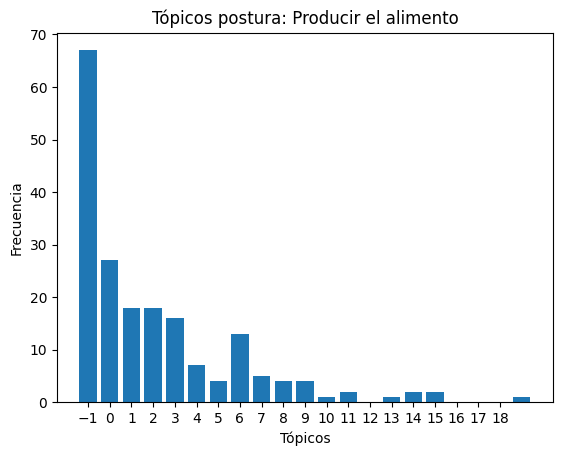

In [26]:
import matplotlib.pyplot as plt

def plot_frecuencies(input_list,label):
    frequency_dict = {}
    for element in input_list:
        if element in frequency_dict:
            frequency_dict[element] += 1
        else:
            frequency_dict[element] = 1
    counts = frequency_dict

    # Switching to the OO-interface. You can do all of this with "plt" as well.
    fig, ax = plt.subplots()

    keys = counts.keys()
    values = counts.values()

    plt.bar(keys, values)

    custom_ticks = list(range(-1,max(input_list)))
    plt.xticks(custom_ticks)

    plt.xlabel('Tópicos')
    plt.ylabel('Frecuencia')
    plt.title('Tópicos postura: {}'.format(label))

    plt.show()

plot_frecuencies(output_sel1[0],label=op_left)

In [27]:
def get_top_k_topics(input_list,k=5):

    frequency_dict = {}
    for element in input_list:
        if element in frequency_dict:
            frequency_dict[element] += 1
        else:
            frequency_dict[element] = 1

    # Sort the dictionary items by their values in descending order
    sorted_items = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

    # Get the top 5 keys with the largest values
    top_k_keys = [item[0] for item in sorted_items[:k]]
    top_k_values = [item[1] for item in sorted_items[:k]]

    top_k_values = [elem/len(input_list) for elem in top_k_values]

    return top_k_keys, top_k_values

top_5_keys, top_5_values = get_top_k_topics(output_sel1[0])

print("Tópicos relevantes para postura: {}".format(op_left))

headers, data = get_table_top_topics(model,top_5_keys,top_5_values,max_w=5)
print_table_md(headers, data)

Tópicos relevantes para postura: Producir el alimento


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 | Palabra 4 | Palabra 5 |
| --- | --- | --- | --- | --- | --- | --- |
| -1 | 0.3489583333333333 | tradiciones | alimento | pueblo | si | importante |
| 0 | 0.140625 | vitamina | déficit | vitamínico | alimento | tradiciones |
| 2 | 0.09375 | adela | debería | priorizar | alimento | pueblo |
| 1 | 0.09375 | fruta | fruto | pueblo | si | puede |
| 3 | 0.08333333333333333 | salud | personas | tradiciones | importante | población |


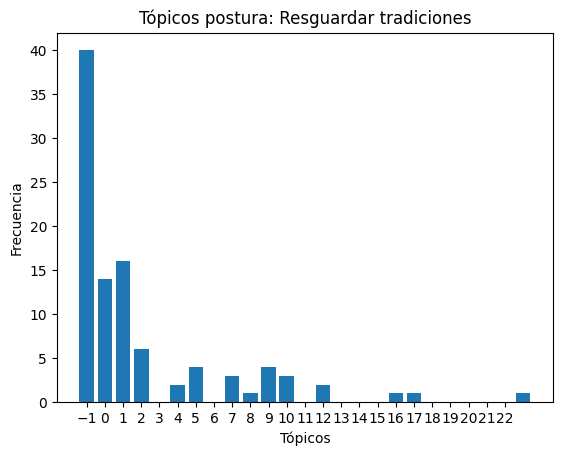

In [28]:
plot_frecuencies(output_sel6[0],label=op_right)

In [29]:
top_5_keys, top_5_values = get_top_k_topics(output_sel6[0])

print("Tópicos relevantes para postura: {}".format(op_right))

headers, data = get_table_top_topics(model,top_5_keys,top_5_values,max_w=5)
print_table_md(headers, data)

Tópicos relevantes para postura: Resguardar tradiciones


| Tópico | Probabilidad | Palabra 1 | Palabra 2 | Palabra 3 | Palabra 4 | Palabra 5 |
| --- | --- | --- | --- | --- | --- | --- |
| -1 | 0.40816326530612246 | tradiciones | alimento | pueblo | si | importante |
| 1 | 0.16326530612244897 | fruta | fruto | pueblo | si | puede |
| 0 | 0.14285714285714285 | vitamina | déficit | vitamínico | alimento | tradiciones |
| 2 | 0.061224489795918366 | adela | debería | priorizar | alimento | pueblo |
| 5 | 0.04081632653061224 | agua | escasez | hídrica | tradiciones | producción |


### Correlaciones

In [30]:
df_test = df.iloc[test_indices]
df_test['sel'].value_counts()

sel
3    87
2    74
4    51
5    35
1    31
6    12
Name: count, dtype: int64

In [31]:
import pandas as pd

arr_test = model.transform(df_to_list(df_test,'comment',tokenizador))[1]
df_topics = pd.DataFrame(arr_test, columns=['Topic{}'.format(i+1) for i in range(24)])

df_topics['sel'] = df_test['sel'].values

In [32]:
from scipy.stats import pearsonr

# Only compute pearson prod-moment correlations between feature
# columns and target column
target_col_name = 'sel'
feature_target_corr = {}
for col in df_topics:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(df_topics[col], df_topics[target_col_name])[0]
print("Feature-Target Correlations")

for k in feature_target_corr.keys():
    print(k+': '+str(feature_target_corr[k]))

Feature-Target Correlations
Topic1_sel: -0.02147101426810395
Topic2_sel: 0.10525824452447627
Topic3_sel: -0.026665205833900318
Topic4_sel: -0.12813319030369694
Topic5_sel: -0.0772629542006842
Topic6_sel: 0.06067187038470812
Topic7_sel: -0.2038410026765787
Topic8_sel: -0.020657809416492444
Topic9_sel: 0.12011769770163479
Topic10_sel: -0.0046517697387105095
Topic11_sel: -0.020089582513511083
Topic12_sel: -0.03735243998640856
Topic13_sel: 0.08155779923140968
Topic14_sel: 0.020197846762651468
Topic15_sel: 0.0212504223163427
Topic16_sel: -0.04503666686875467
Topic17_sel: 0.026494605020155697
Topic18_sel: 0.001228035814890084
Topic19_sel: 0.03461437344950799
Topic20_sel: -0.051365775502984795
Topic21_sel: -0.04688767998865991
Topic22_sel: 0.017241924602713458
Topic23_sel: -0.044134511942501675
Topic24_sel: 0.09609055901517766


Guardando el modelo

In [33]:
model.save("modelos/BT-{}.bertopic".format(caso))

Para cargar:

`my_model = BERTopic.load("modelos/BT-caso")`